In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(f"heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [13]:
df.columns = [col.strip().replace(' ', '_') for col in df.columns]
df

,Age,Gender,Blood_Pressure,Cholesterol_Level,Exercise_Habits,Smoking,Family_Heart_Disease,Diabetes,BMI,High_Blood_Pressure,...,High_LDL_Cholesterol,Alcohol_Consumption,Stress_Level,Sleep_Hours,Sugar_Consumption,Triglyceride_Level,Fasting_Blood_Sugar,CRP_Level,Homocysteine_Level,Heart_Disease_Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,Medium,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,Medium,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [25]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [27]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median()) 
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [29]:
label_enc = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

In [31]:
multi_class_cols = [col for col in cat_cols if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [43]:
print(df.columns)

Index(['Age', 'Gender', 'Blood_Pressure', 'Cholesterol_Level', 'Smoking',
       'Family_Heart_Disease', 'Diabetes', 'BMI', 'High_Blood_Pressure',
       'Low_HDL_Cholesterol', 'High_LDL_Cholesterol', 'Sleep_Hours',
       'Triglyceride_Level', 'Fasting_Blood_Sugar', 'CRP_Level',
       'Homocysteine_Level', 'Heart_Disease_Status', 'Exercise_Habits_Low',
       'Exercise_Habits_Medium', 'Alcohol_Consumption_Low',
       'Alcohol_Consumption_Medium', 'Stress_Level_Low', 'Stress_Level_Medium',
       'Sugar_Consumption_Low', 'Sugar_Consumption_Medium'],
      dtype='object')


In [45]:
X = df.drop(columns=["Heart_Disease_Status"])  
y = df["Heart_Disease_Status"]


In [47]:
if y.dtype == 'object':
    y = label_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


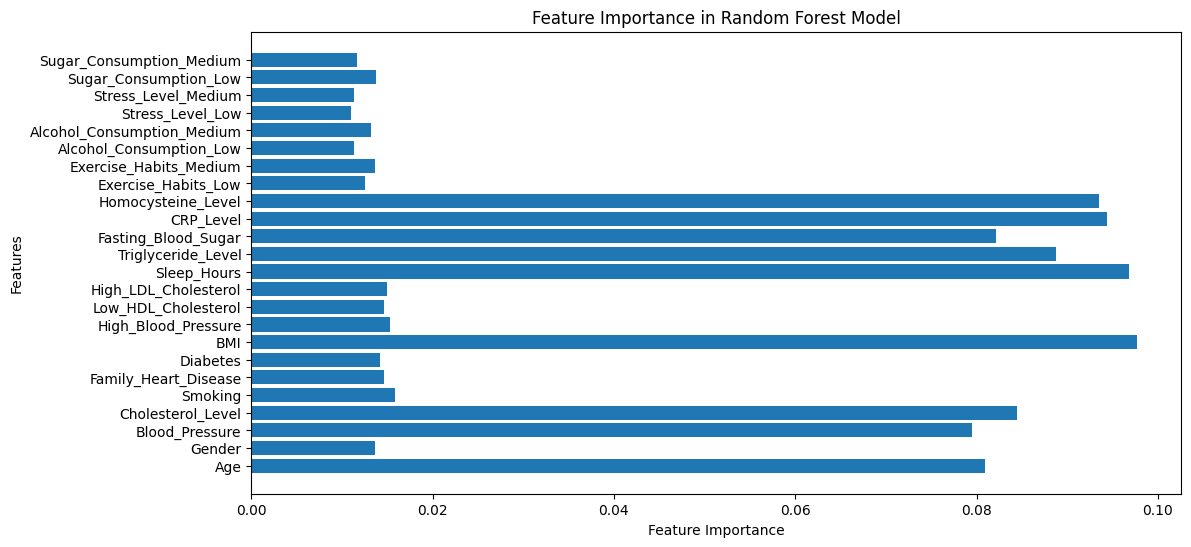

Most important feature: BMI


In [55]:
plt.figure(figsize=(12, 6))
plt.barh(X.columns, clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

most_important_feature = X.columns[np.argmax(clf.feature_importances_)]
print(f"Most important feature: {most_important_feature}")